In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel('./data/umbrellas_sold_1.xlsx')

In [8]:
df.head() # ข้อมูลของเดือนแต่ละเดือน มีปริมาณน้ำฝน และจำนวนร้านค้าที่ขายร่มได้

,month,rainfall_mm,umbrellas_sold
0,Jan,82.0,15
1,Feb,92.5,25
2,Mar,83.2,17
3,Apr,97.7,28
4,May,131.9,41


แบบ อาจารย์

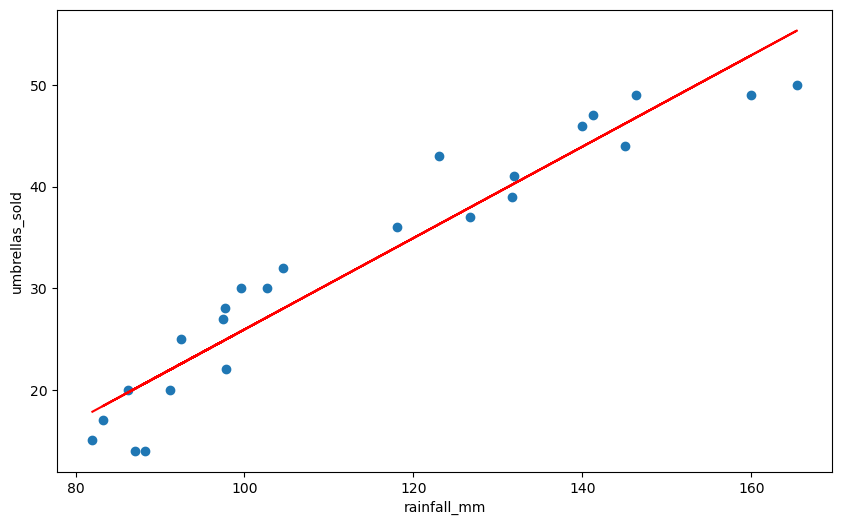

[25.926023]


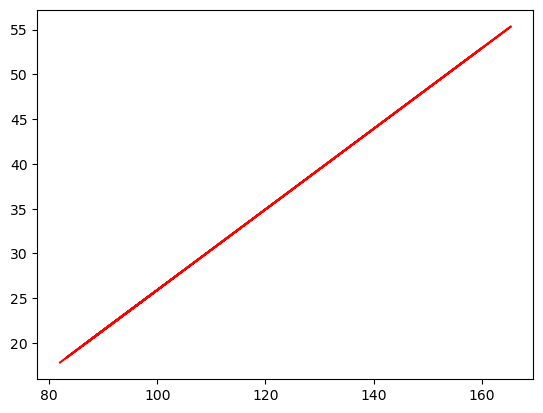

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = df['rainfall_mm']     # กำหนดข้อมูล x จาก column 'rainfall_mm' ของ DataFrame
y = df['umbrellas_sold']  # กำหนดข้อมูล y จาก column 'umbrellas_sold' ของ DataFrame

x = np.array(x).reshape(-1,1)   # reshape x เป็น 2 มิติ array (n_samples, n_features)
model = LinearRegression()      # สร้าง LinearRegression object
model.fit(x,y)                  # fit โมเดล Linear Regression ด้วยข้อมูล x และ y

plt.figure(figsize=(10,6))     # กำหนดขนาดของกราฟ
plt.scatter(x,y)               # สร้าง scatter plot โดยใช้ x และ y
# y = a + bx
a = model.intercept_           # คำนวณค่า intercept
b = model.coef_[0]             # คำนวณค่า slope

y2 = a + b*x                  # คำนวณค่า y จากสมการเชิงเส้น
plt.plot(x,y2,color='red')    # สร้างเส้น regression line โดยใช้ x และ y2
plt.xlabel('rainfall_mm')      # กำหนดชื่อแกน x
plt.ylabel('umbrellas_sold')   # กำหนดชื่อแกน y
plt.show()                     # แสดงกราฟ

#2
y3 = model.predict(x)          # คำนวณค่า y จากโมเดล Linear Regression โดยใช้ x
plt.plot(x,y3,color='red')     # สร้างเส้น regression line โดยใช้ x และ y3
y4 = model.predict([[100]])   # ทำนายค่า y สำหรับ x = 100 โดยใช้โมเดล Linear Regression
print(y4)
plt.show()

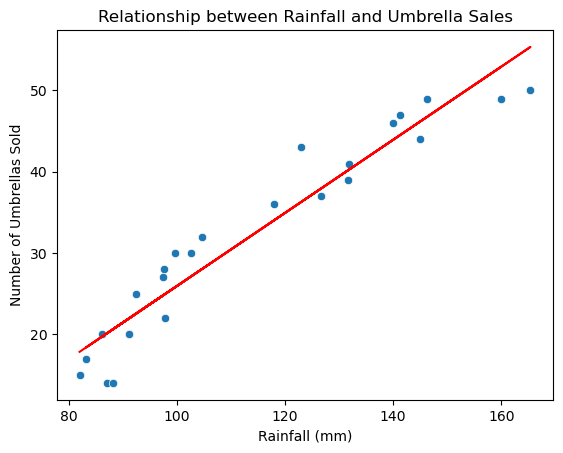

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# assume df contains the data

# create a LinearRegression object and fit the data
model = LinearRegression().fit(df[['rainfall_mm']], df['umbrellas_sold'])

# plot the data points as a scatter plot
sns.scatterplot(x='rainfall_mm', y='umbrellas_sold', data=df)

# plot the regression line
plt.plot(df['rainfall_mm'], model.predict(df[['rainfall_mm']]), color='red')

# add labels and title
plt.xlabel('Rainfall (mm)')
plt.ylabel('Number of Umbrellas Sold')
plt.title('Relationship between Rainfall and Umbrella Sales')

# show the plot
plt.show()

ตัวอย่างข้อมูล ที่ทำ Linear Regression ยาก เพราะข้อมูล มีความสัมพันธ์ ไม่เป็นเส้นตรง

In [42]:
df = pd.read_csv('./data/co2-emission.csv')
df.head()

,car,model,volume,weight,co2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


จำนวน  CO2 ที่ออกจากรถยนต์ 1 ลิตร คือ 87.25347181898782 กรัม
ความแม่นยำของโมเดล คือ 37.66%


c:\Users\puemm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


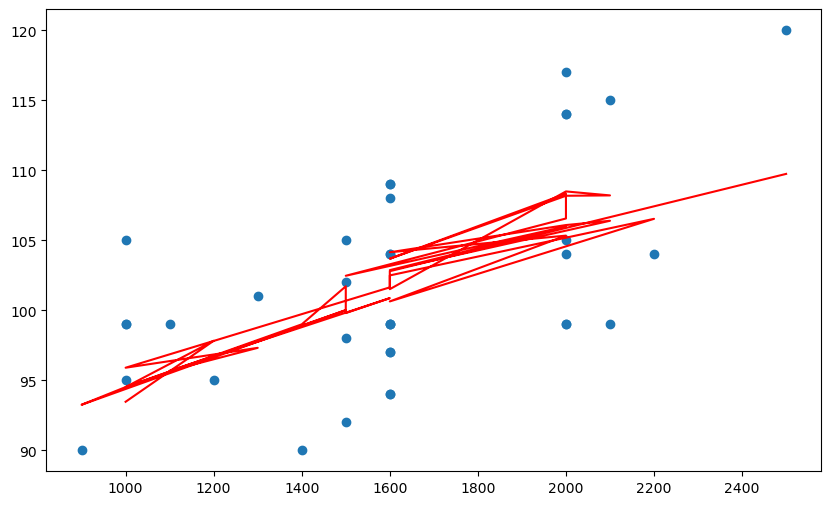

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = df[['volume', 'weight']]
y = df['co2']

model = LinearRegression()
model.fit(x,y)
plt.figure(figsize=(10,6))
plt.scatter(x['volume'],y)

y3 = model.predict(x)
plt.plot(x['volume'],y3,'r')
print(f"จำนวน  CO2 ที่ออกจากรถยนต์ 1 ลิตร คือ {model.predict([[1, 1000]])[0]} กรัม")
print(f"ความแม่นยำของโมเดล คือ {model.score(x,y)*100:.2f}%")